### NAME: SAGAR SURYAKANT DHURI 
### TASK NO 3: CAR PRICE PREDICTIONS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


### IMPORTING URL

In [3]:
car=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')

### Displaying Datasets

In [4]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
print(car.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [6]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
car.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [13]:
car.fuelsystem.unique()


array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


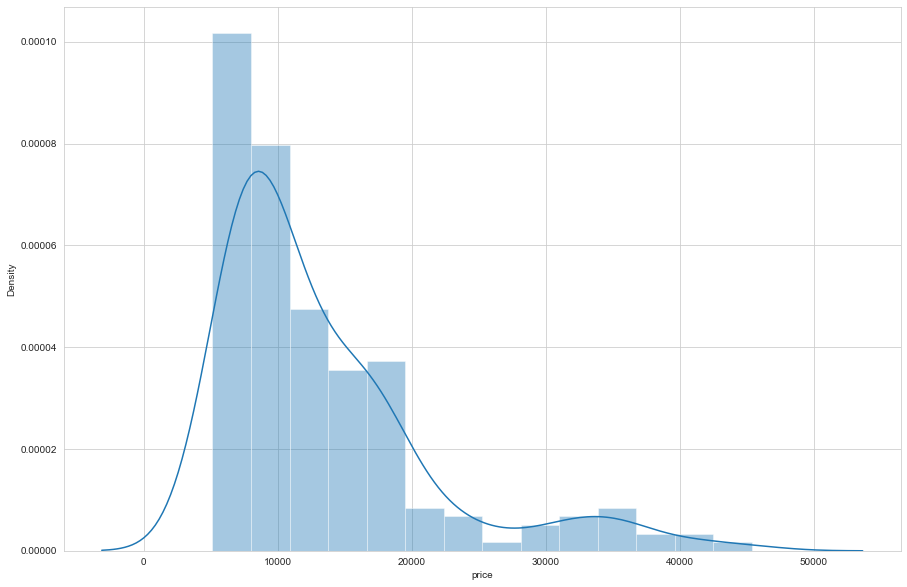

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(car.price)
plt.show()

In [52]:
print(car.corr())

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -

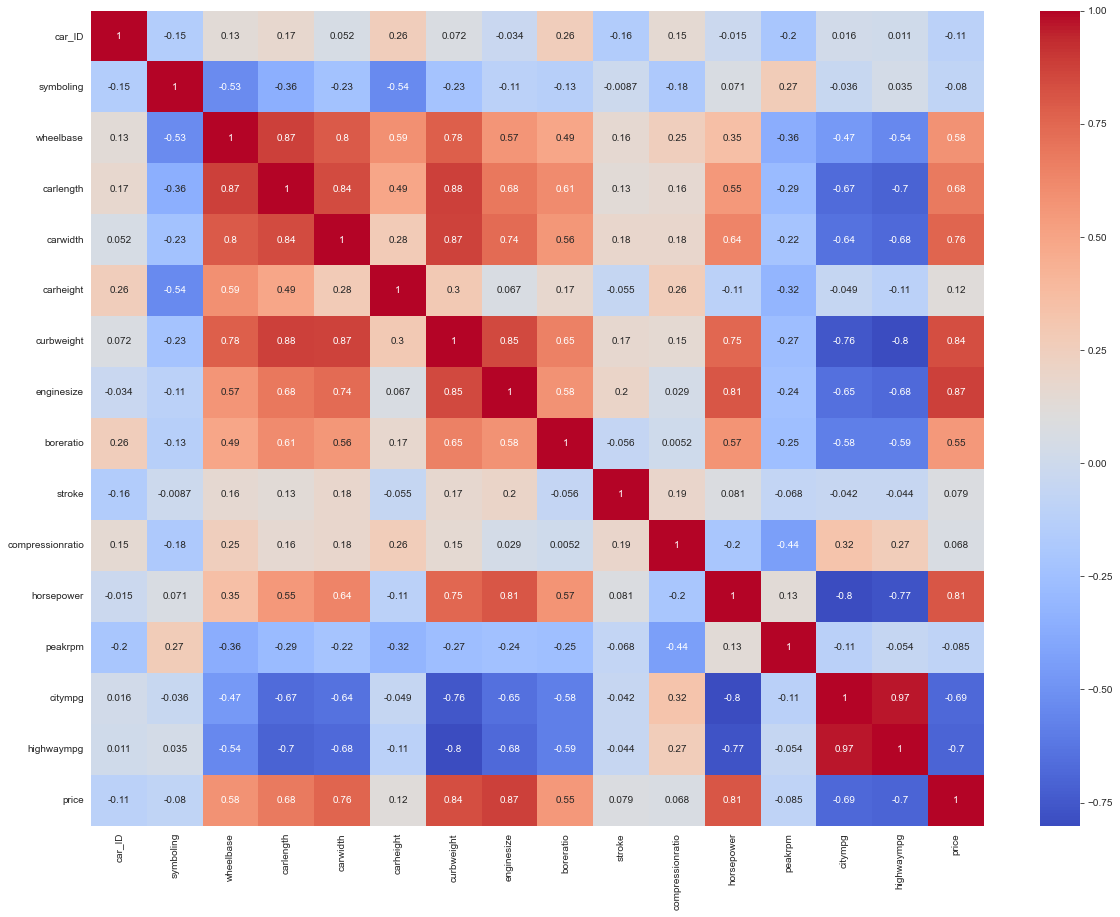

In [12]:
plt.figure(figsize=(20, 15))
correlations = car.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

Text(0.5, 1.0, 'Most Bought Car')

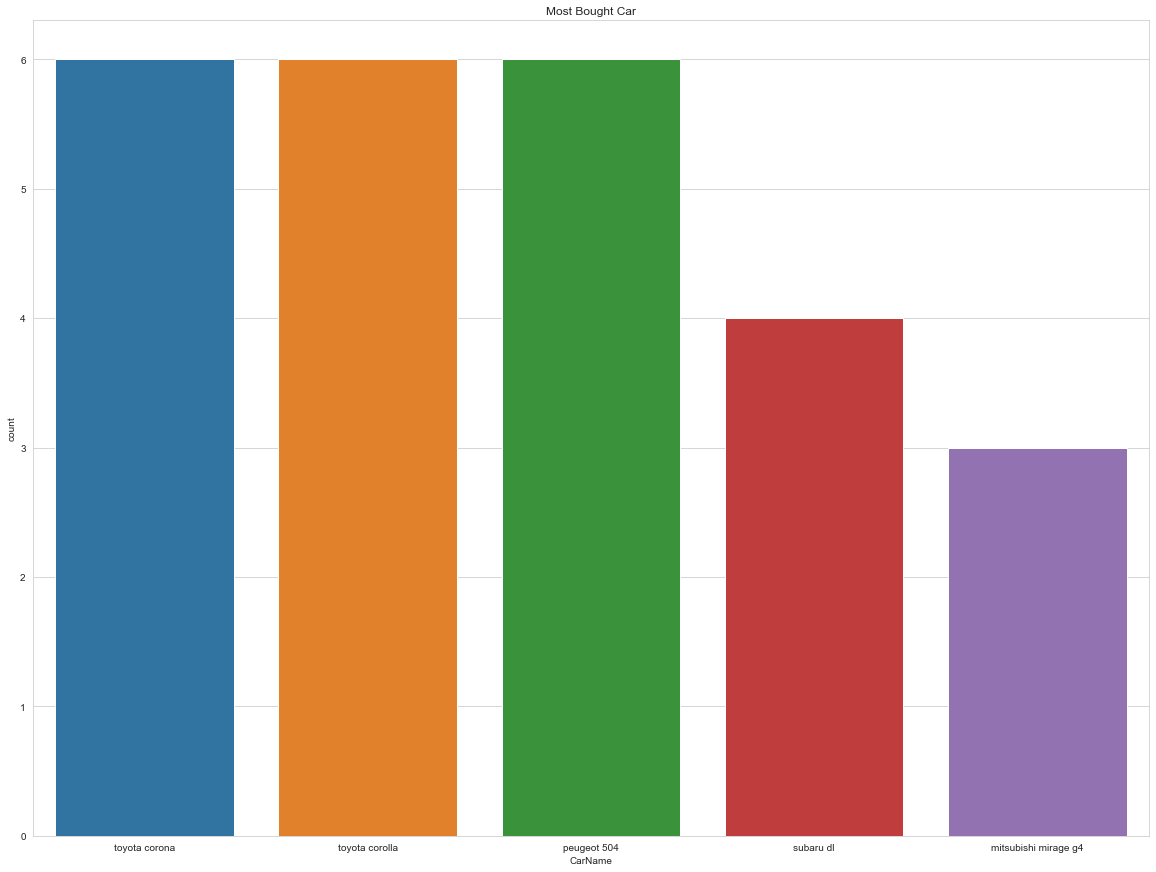

In [22]:
plt.figure(figsize=(20, 15))
sns.countplot(x="CarName",dodge=True,data=car,saturation=0.75,order=car["CarName"].value_counts()[0:5].index) 
plt.title("Most Bought Car")

Text(0.5, 1.0, 'Car Price Range')

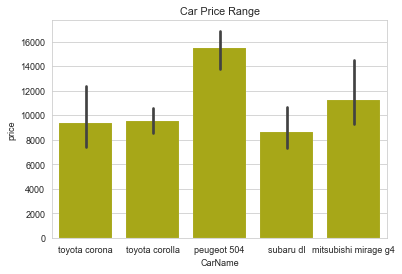

In [47]:
plt.rcParams.update({'font.size': 9})
sns.barplot(x="CarName",y="price",linewidth=0.1,color='y',data=car,order=car['CarName'].value_counts()[0:5].index)  
plt.title("Car Price Range")


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

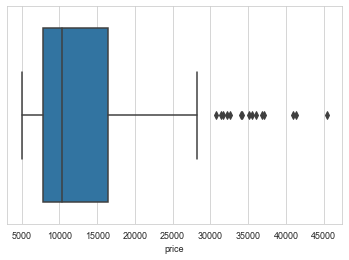

In [48]:
sns.boxplot(car["price"])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


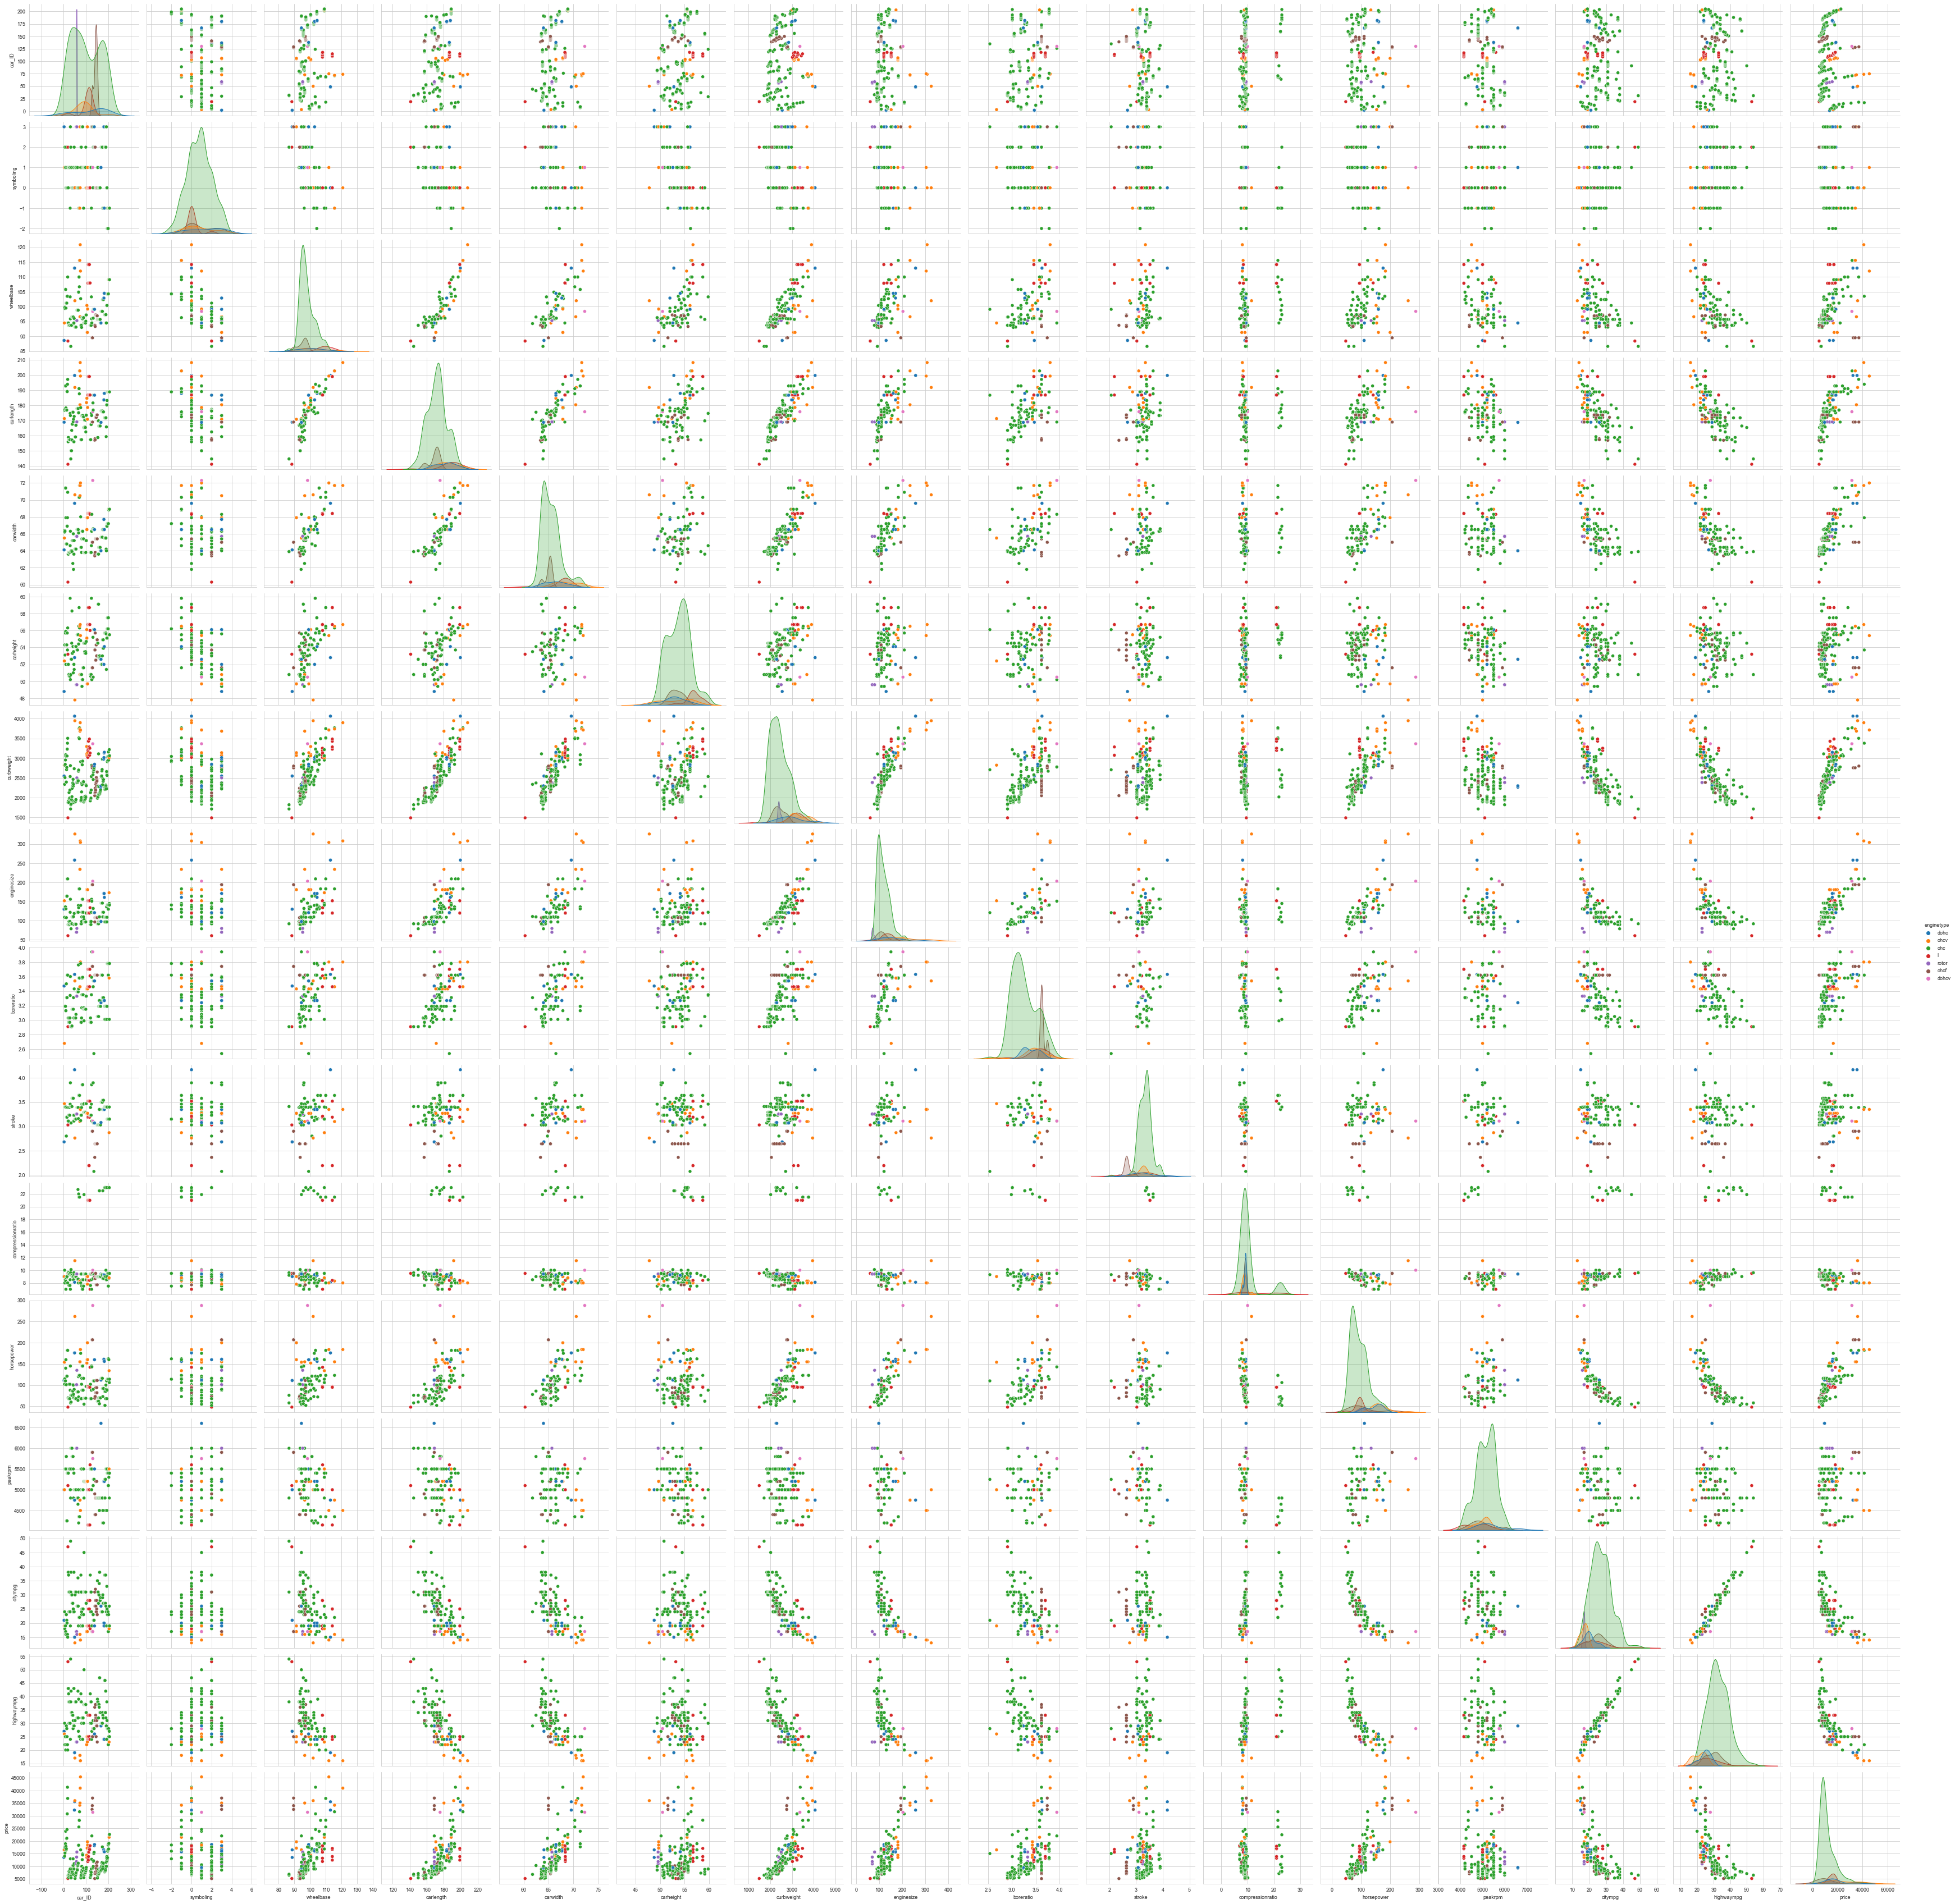

In [50]:
sns.pairplot(car,hue='enginetype',height=2.5,aspect=1,size=3)

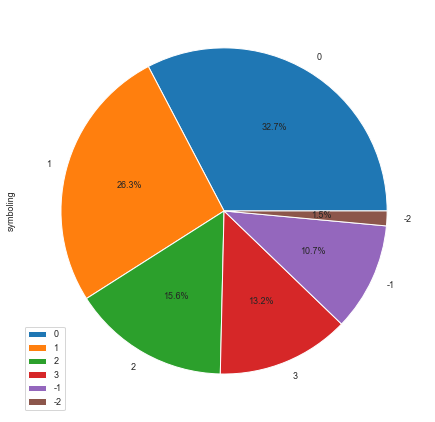

<Figure size 432x288 with 0 Axes>

In [73]:
car_df = pd.DataFrame(car['symboling'].value_counts())
car_df.plot.pie(subplots=True,labels = car_df.index.values, autopct='%1.1f%%', figsize = (15,7.5))
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

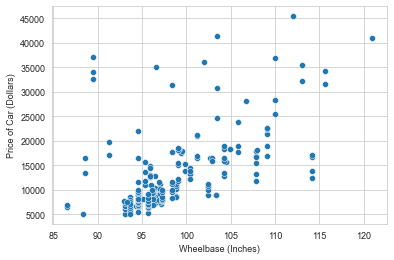

In [75]:
plt1 = sns.scatterplot(x = 'wheelbase', y = 'price', data = car)
plt1.set_xlabel('Wheelbase (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

In [82]:
auto = car[['carlength', 'carwidth', 'curbweight','enginesize', 'boreratio', 'horsepower', 'price']]

In [83]:
auto.head()

,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
0,168.8,64.1,2548,130,3.47,111,13495.0
1,168.8,64.1,2548,130,3.47,111,16500.0
2,171.2,65.5,2823,152,2.68,154,16500.0
3,176.6,66.2,2337,109,3.19,102,13950.0
4,176.6,66.4,2824,136,3.19,115,17450.0


<Figure size 1080x1080 with 0 Axes>

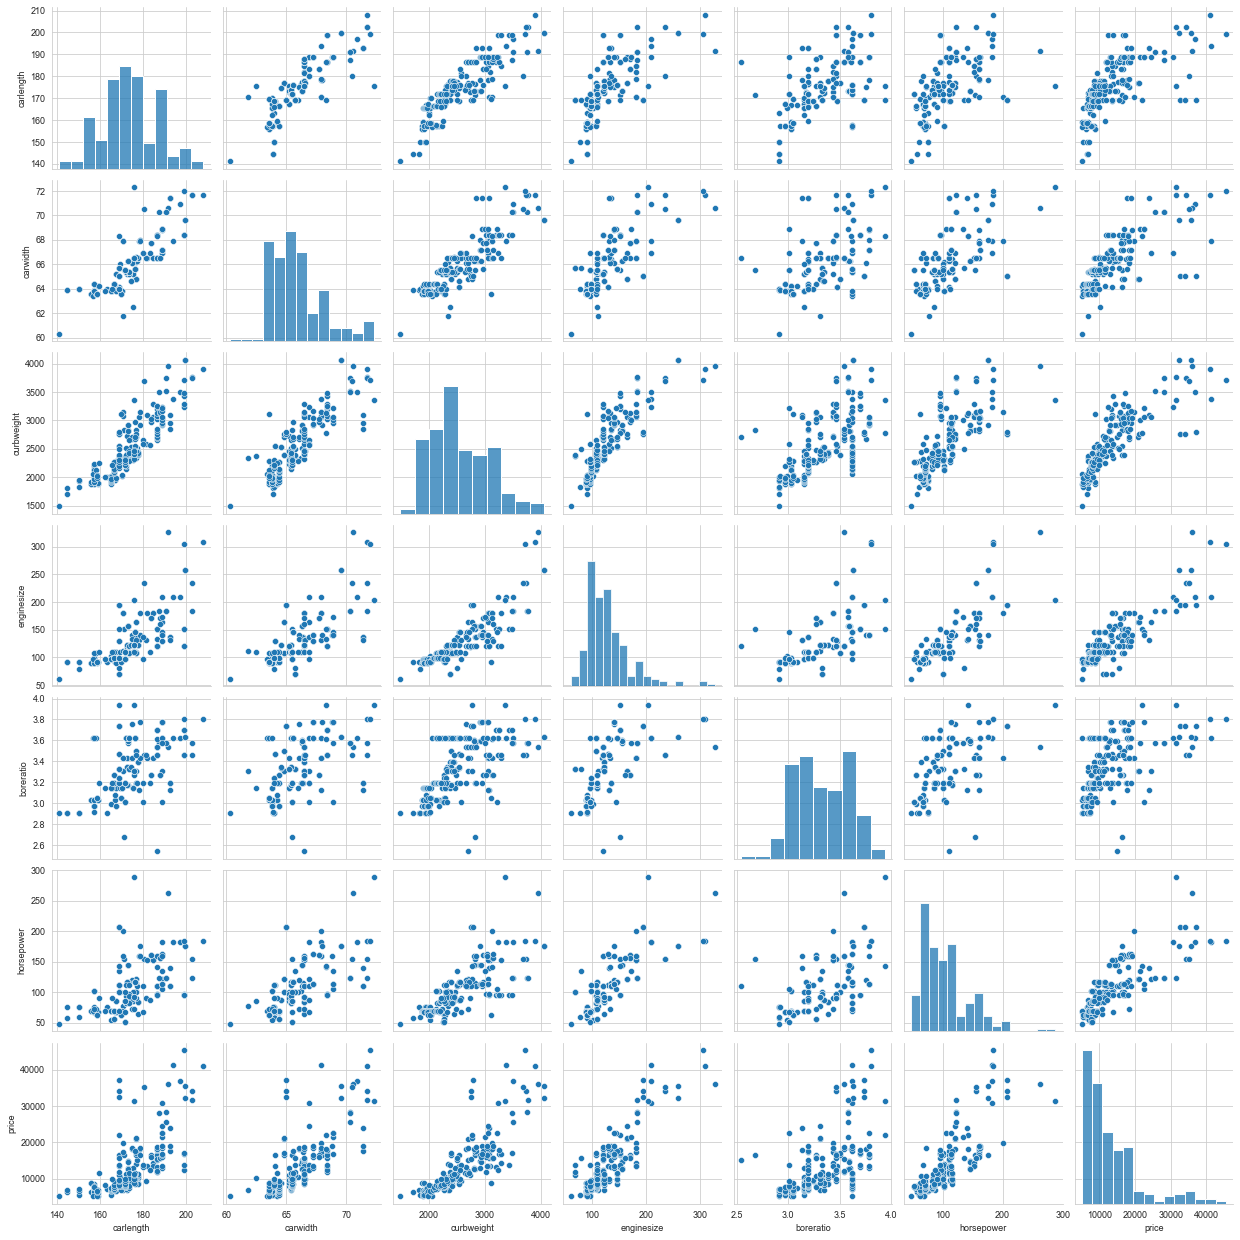

In [84]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()

## Splitting Datasets to Train and Test

In [85]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [87]:
scaler = MinMaxScaler()

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
num_vars = ['carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price',]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [90]:
df_train.head()

,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
122,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818
125,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890
166,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110
1,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446
199,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131


In [92]:
df_train.describe()

,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.219310
std,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.215682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.067298
50%,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.140343
75%,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.313479
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

In [93]:
y_train = df_train.pop('price')
X_train = df_train

In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [98]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [99]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('carlength', False, 3),
 ('carwidth', False, 2),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 4),
 ('horsepower', True, 1)]

In [100]:
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'enginesize', 'horsepower'], dtype='object')

In [101]:
X_train_rfe = X_train[col]

In [102]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [103]:
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [104]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           2.16e-51
Time:                        19:44:22   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.017     -7.469      0.0

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,5.25
0,const,4.80
1,curbweight,4.11
3,horsepower,3.12


In [107]:
X_train_new1 = X_train_rfe.drop(["const"], axis = 1) 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           2.16e-51
Time:                        19:45:29   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.017     -7.469      0.0

In [109]:
X_train_new2 = X_train_new1.drop(["enginesize"], axis = 1)

import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     274.8
Date:                Thu, 08 Jun 2023   Prob (F-statistic):           3.34e-49
Time:                        19:47:58   Log-Likelihood:                 130.96
No. Observations:                 143   AIC:                            -255.9
Df Residuals:                     140   BIC:                            -247.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1323      0.018     -7.401      0.0

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,6.83
1,horsepower,6.83


In [111]:
y_train_price = lm.predict(X_train_lm)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

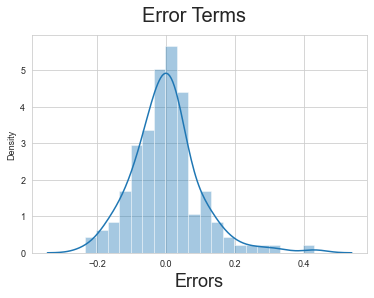

In [112]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)   

## Predictions

In [113]:
num_vars = ['carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [114]:
y_test = df_test.pop('price')
X_test = df_test

In [117]:
X_test_new = X_test[['curbweight','horsepower']]
X_test_new = sm.add_constant(X_test_new)

In [118]:
y_pred = lm.predict(X_test_new)

## Model Evaluation

In [119]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7161001939145301

Text(0, 0.5, 'y_pred')

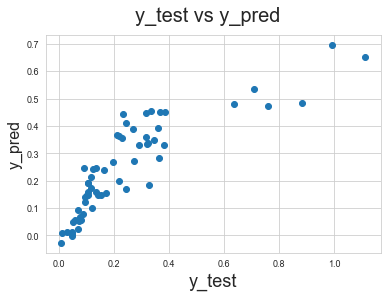

In [120]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)           
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)    

### We can see that the equation of our best fitted line is:
### price = 0.3957 curbweight + 0.4402 horsepower + 0.2794 

In [1]:
# Thank You